In [1]:
from geneticalgorithm import geneticalgorithm as ga
import pandas as pd
import numpy as np
# Datenimport
dat = []
with open("lichtkurve.txt","r") as file:
    for lines in file:
        dat.append([float(lines.split()[0]),float(lines.split()[1])])

data = np.array(dat)
print(len(data[:,0]))

200


 The best solution found:                                                                           
 [1.46141461e+00 6.12037611e-01 1.08898421e+01 2.46839709e+01
 3.07037429e-01 2.11973700e+01 8.74987277e+01 9.98992889e-01
 8.04163363e+00 3.81905840e+01 1.41663331e-03]

 Objective function:
 63.360850103524484


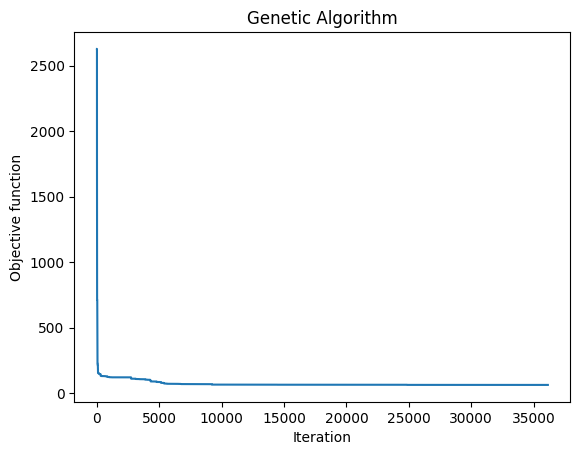

In [3]:
from copy import deepcopy
# schreibe fitfunktion
def fit_function(x):
    n = len(x)
    a = x[0]
    b= x[1]
    amp = x[2::3]
    omega = x[3::3]
    phi = x[4::3]
    fun = 0
    for j in range((n-2)//3):
        fun += amp[j]*np.sin(omega[j]*data[:,0]+phi[j])
    fun += a*data[:,0]+b
    return np.linalg.norm((fun-data[:,1])**2/25)
reports =[]
solutions = []
# versuche verschiedene Zahlen an sinusfunktionen hinter eineander zu fitten. Ergebnisse sind aber nicht gut.
for i in range(3,4):
    bounds = np.zeros((2+3*i,2))
    bounds[0,:]=np.array([0,20])
    bounds[1,:]=np.array([0,100])
    for k in range(i):
        k +=1
        bounds[k*3,:]=np.array([0,100])#2*np.pi/50,np.pi/(data[0,1]-data[0,0])])
        bounds[k*3-1,:]=np.array([0,100])
        bounds[1+k*3,:]=np.array([0,1])
    model = ga(fit_function,2+3*i,variable_type='real',variable_boundaries=bounds)
    model.run()
    reports.append(model.report)
    solutions.append(model.output_dict)

        
    



In [1]:
from copy import deepcopy
from scipy.optimize import minimize
def fit_function(x):
    n = len(x)
    a = x[0]*10
    b= x[1]*100
    amp = x[2::3]*100
    per = x[3::3]*(50-(data[1,0]-data[0,0]))+(data[1,0]-data[0,0])
    phi = x[4::3]*np.pi*2
    fun = 0
    for j in range((n-2)//3):
        fun = deepcopy(fun+amp[j]*np.sin(2*np.pi/per[j]*data[:,0]+phi[j]))
    fun += a*data[:,0]+b
    return np.linalg.norm((fun-data[:,1])**2/25)**2

# hier versuche ich die Parameter, die an die ga funktion übergeben werde mit einer scipy minimize function zu optimieren. Ist aber irgendwie nicht Sinn der 
# Sache denke ich, funktioniert auch nicht da ouput Fenster crasht.


def iterator(i,a):
    bounds = np.zeros((2+3*i,2))
    bounds[0,:]=np.array([0,20])
    bounds[1,:]=np.array([0,100])
    for k in range(1,1+i):
        bounds[k*3,:]=np.array([(data[1,0]-data[0,0])*2,50])
        bounds[k*3-1,:]=np.array([0,100])
        bounds[1+k*3,:]=np.array([0,2*np.pi])
    bounds[:,0]=np.zeros(i*3+2)
    bounds[:,1]=np.ones(i*3+2)
    algorithm_param = {'max_num_iteration': 300+10000/(1-0.044)*(a[1]-0.02),\
                   'population_size':a[0],\
                   'mutation_probability':a[1],\
                   'elit_ratio': a[2],\
                   'crossover_probability': a[3],\
                   'parents_portion': a[4],\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}
    model = ga(fit_function,2+3*i,variable_type='real',variable_boundaries=bounds,algorithm_parameters=algorithm_param)
    model.run()
    return model
def mean_it(a):
    n =5
    min_val = 10**12
    # parameter = np.zeros(2+n*3)
    for rep in range(7):
        model = iterator(n,a)
        if (model.output_dict['function']<min_val):
            min_val =model.output_dict['function']
            # paramter = model.output_dict['variable']
    return min_val
opt = {"maxiter":100,"disp":True}
a0 = np.array([100,0.044,0.23,0.9,0.3])
bs = [(0,1),(0,1),(0,1),(0,1),(0,1)]
minimize(mean_it,x0=a0,bounds=bs,options=opt)

NameError: name 'np' is not defined

 The best solution found:                                                                           
 [1.01714644e-01 1.86719562e-01 6.69447370e-02 7.26852912e-04
 6.61137177e-01 1.14538891e-01 4.01743146e-01 5.50994696e-01
 1.96022811e-02 1.61248719e-01 9.83067989e-01 1.08262349e-01
 1.69872027e-01 7.44693980e-01]

 Objective function:
 182.92169463207074


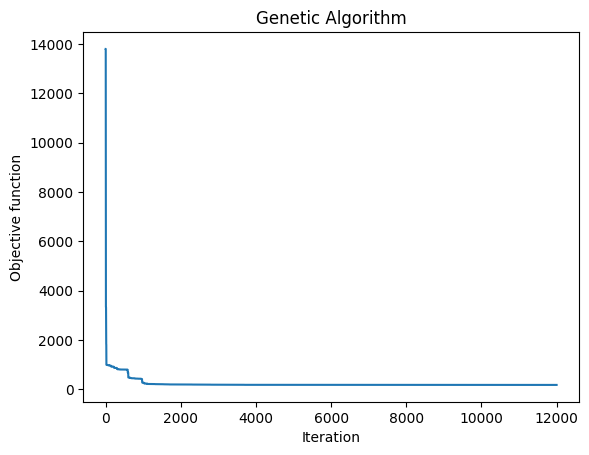

In [30]:
from copy import deepcopy
from scipy.optimize import minimize
def fit_function2(x):
    n = len(x)
    a = x[0]*10
    b= x[1]*100
    amp = x[2::3]*100
    per = x[3::3]*(50-(data[1,0]-data[0,0]))+(data[1,0]-data[0,0])
    phi = x[4::3]*np.pi*2
    fun = 0
    for j in range((n-2)//3):
        fun = deepcopy(fun)+amp[j]*np.sin(2*np.pi/per[j]*data[:,0]+phi[j])
    fun += a*data[:,0]+b
    return np.sum((fun-data[:,1])**2/25)

sin_numb =4
bs = np.zeros((2+3*sin_numb,2))
for i in range(bs.shape[0]):
    bs[i,:]=np.array([0,1])
algorithm_param = {'max_num_iteration': 12000,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.04,\
                   'crossover_probability': 0.6,\
                   'parents_portion': 0.35,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}
model = ga(fit_function2,2+3*sin_numb,variable_type='real',variable_boundaries=bs,algorithm_parameters=algorithm_param)
model.run()

[1.01714644e-01 1.86719562e-01 6.69447370e-02 7.26852912e-04
 6.61137177e-01 1.14538891e-01 4.01743146e-01 5.50994696e-01
 1.96022811e-02 1.61248719e-01 9.83067989e-01 1.08262349e-01
 1.69872027e-01 7.44693980e-01]
182.92169463207074


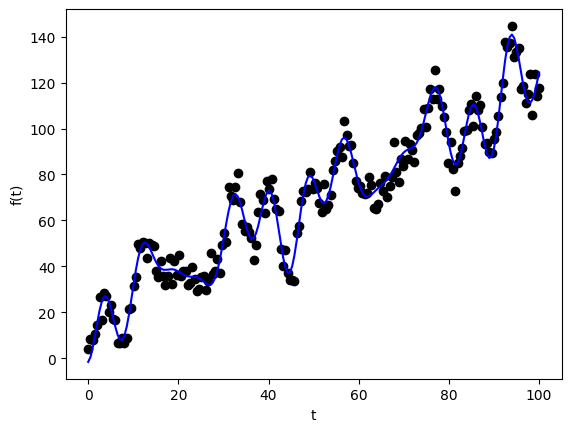

In [31]:
from copy import deepcopy
print(model.output_dict['variable'])
print(model.output_dict['function'])
def func(x):
    n = len(x)
    a = x[0]*10
    b= x[1]*100
    amp = x[2::3]*100
    per = x[3::3]*(50-(data[1,0]-data[0,0]))+(data[1,0]-data[0,0])
    phi = x[4::3]*np.pi*2
    fun = 0
    for j in range((n-2)//3):
        fun = deepcopy(fun+amp[j]*np.sin(2*np.pi/per[j]*data[:,0]+phi[j]))
    fun += a*data[:,0]+b
    return fun

def function(x):
    n = len(x)
    a = x[0]
    b= x[1]
    amp = x[2::3]
    omega = x[3::3]
    phi = x[4::3]
    fun = 0
    for j in range((n-2)//3):
        fun += amp[j]*np.sin(omega[j]*data[:,0]+phi[j])
    fun += a*data[:,0]+b
    return fun
# The best solution found:                                                                           
sol1 =np.array([0.09798778, 0.20608542 ,0.11628849 ,0.3979806 , 0.53418943, 0.06226311,\
 0.13869759 ,0.69238701, 0.0983469 , 0.17188282, 0.79684985])

#  Objective function:
#  480.79525468815694
sol2 = np.array([0.09616979 ,0.21573013, 0.06426048, 0.14040606, 0.77714808 ,0.09225056,\
 0.17169609, 0.78222235, 0.11866551 ,0.39296813, 0.50078183])

#  Objective function:
#  521.7925842396393
import matplotlib.pyplot as plt

sol3 = np.array([0.10014259 ,0.19303549, 0.0983166,  0.17157312, 0.79826895, 0.11592457,\
 0.39663454 ,0.52198457 ,0.0657487,  0.14200652, 0.84835685])

sol5 = np.array([0.10284717 ,0.17902222 ,0.13650752, 0.50144156, 0.10103556, 0.09636131,\
 0.17247205, 0.8194235 , 0.06644382, 0.14007755, 0.7633714 , 0.11098276,\
 0.39186988 ,0.48990606, 0.12634632, 0.50690151, 0.63620865])

sol =np.array([1.04182341e-01, 1.72419433e-01, 1.80885677e-02, 1.62157678e-01,\
 4.11966760e-01 ,6.73871122e-02, 1.39856704e-01,7.49256642e-01,\
 8.59092066e-02 ,5.94540628e-04, 6.43980470e-01 ,1.34772775e-02,\
 5.50500909e-01 ,1.59209647e-01 ,1.14436154e-01, 3.95799592e-01,\
 5.21393985e-01])
plt.figure()#(facecolor="white")
ax = plt.axes()
# ax.set_facecolor("white")
# ax.spines['bottom'].set_color('black')
# ax.spines['left'].set_color('black')
# ax.xaxis.label.set_color('black')
# ax.yaxis.label.set_color('black')
# ax.tick_params(axis='x', colors='black')
# ax.ticklabel_format(style='scientific',scilimits=(-3,3))
# ax.tick_params(axis='y', colors='black')
ax.set_xlabel('t')
ax.set_ylabel('f(t)')
ax.scatter(data[:,0],data[:,1],color="black")
ax.plot(data[:,0],func(model.output_dict['variable']),color='blue')
plt.show()
# model.output_dict


In [36]:
(6.177-4.679)/np.pi

0.4768282095033182

The best solution found:                                                                           
 [0.10444367 0.17084257 0.06920959 0.14282664 0.89123158 0.11693492
 0.40108474 0.55067927 0.10323522 0.17288208 0.83830323]

 Objective function:
 209.68188234606572

The best solution found:                                                                           
 [0.09848945 0.19965899 0.09454023 0.17392704 0.86422233 0.06582135
 0.13953184 0.73782924 0.11787891 0.39803727 0.5340206 ]

 Objective function:
 195.19535120248216

[0.10014259 0.19303549 0.0983166  0.17157312 0.79826895 0.11592457
 0.39663454 0.52198457 0.0657487  0.14200652 0.84835685]
181.2614079273544

4 sin 
The best solution found:                                                                           
 [0.10023996 0.19483556 0.09437915 0.16964339 0.73211126 0.07030853
 0.14056254 0.77814712 0.04323661 0.37891032 0.39130662 0.07941029
 0.40759611 0.59364041]

 Objective function:
 194.61228288199118

 
5 sin

The best solution found:                                                                           
 [0.09835737 0.20293969 0.09888803 0.17017222 0.75505131 0.44955544
 0.95495203 0.43695827 0.06757051 0.14244802 0.86283352 0.11782283
 0.39663094 0.51974594 0.43813583 0.95541446 0.93773614]

 Objective function:
 192.27371160270542

The best solution found:                                                                           
 [0.10284717 0.17902222 0.13650752 0.50144156 0.10103556 0.09636131
 0.17247205 0.8194235  0.06644382 0.14007755 0.7633714  0.11098276
 0.39186988 0.48990606 0.12634632 0.50690151 0.63620865]

 Objective function:
 176.6259871178084

In [37]:
# x = np.array([0.10014259 ,0.19303549, 0.0983166,  0.17157312, 0.79826895, 0.11592457,\
#  0.39663454 ,0.52198457 ,0.0657487,  0.14200652, 0.84835685])
x = model.output_dict['variable']
a = x[0]*10
b= x[1]*100
amp = x[2::3]*100
per = x[3::3]*(50-(data[1,0]-data[0,0]))+(data[1,0]-data[0,0])
phi = x[4::3]*np.pi*2

In [38]:
print("&{:.3f}&{:.3f}&&&\\\\".format(a,b))
for i in range(1,5):
    print("{}&&&{:.3f}&{:.3f}&{:.3f}\\\\".format(i,amp[i-1],per[i-1],phi[i-1]))

&1.017&18.672&&&\\
1&&&6.694&0.538&4.154\\
2&&&11.454&20.388&3.462\\
3&&&1.960&8.484&6.177\\
4&&&10.826&8.911&4.679\\


In [2]:
def fit1(x):
    r_sq = (x[0]-0.5)**2+(x[1]-0.5)**2
    return 1/(2+np.cos(9*np.pi*np.sqrt(r_sq))*np.exp(-r_sq/0.15))

def fit2(x):
    r1 = (x[0]-0.5)**2+(x[1]-0.5)**2
    r2 = (x[0]-0.6)**2+(x[1]-0.1)**2
    return 1/(0.8*np.exp(-r1/0.3**2)+0.879008*np.exp(-r2/(0.03)**2))

 The best solution found:                                                                           
 [0.49999929 0.50000118]

 Objective function:
 0.3333333334189801


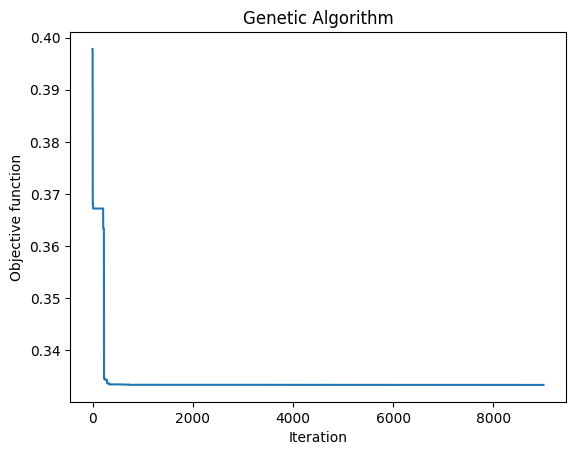

In [3]:
algorithm_param = {'max_num_iteration': 9000,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}
bounds = np.array([[-2,2],[-2,2]])
model = ga(fit1,2,variable_type='real',variable_boundaries=bounds,algorithm_parameters=algorithm_param)
model.run()
    

In [19]:
table = np.reshape(sol1[2:],(3,3))
table[:,0] *=100
table[:,1] *= (50-(data[1,0]-data[0,0]))+(data[1,0]-data[0,0])
table[:,2] *= np.pi*2
print(sol1[:2])
for i in range(3):
    print("{}&&&{:.3f}&{:.3f}&{:.3f}\\\\".format(i,table[i,0],table[i,1],table[i,2]))      

[0.09798778 0.20608542]
0&&&116288.490&49747.575&132.506\\
1&&&62263.110&17337.199&171.747\\
2&&&98346.900&21485.353&197.659\\
